In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# upload dataset
df = pd.read_csv(
    "data/exoplanet.csv",
    comment="#",          
    engine="python"       
)

df.shape
df.head()


,rowid,pl_name,hostname,pl_letter,hd_name,hip_name,tic_id,gaia_dr2_id,gaia_dr3_id,default_flag,...,rowupdate,pl_pubdate,releasedate,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec,pl_ndispec
0,1,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,Gaia DR3 3946945413106333696,1,...,2023-09-19,2023-08,2023-09-19,2.0,1.0,2.0,0.0,0.0,0.0,0.0
1,2,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,Gaia DR3 3946945413106333696,0,...,2014-05-14,2008-01,2014-05-14,2.0,1.0,2.0,0.0,0.0,0.0,0.0
2,3,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,Gaia DR3 3946945413106333696,0,...,2014-07-23,2011-08,2014-07-23,2.0,1.0,2.0,0.0,0.0,0.0,0.0
3,4,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,Gaia DR3 1696798367260229376,0,...,2018-04-25,2009-10,2014-05-14,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,5,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,Gaia DR3 1696798367260229376,1,...,2018-09-04,2017-03,2018-09-06,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [19]:
#keep just the best observation

df = df[df["default_flag"] == 1]

df.info



<bound method DataFrame.info of        rowid     pl_name  hostname pl_letter    hd_name    hip_name  \
0          1    11 Com b    11 Com         b  HD 107383   HIP 60202   
4          5    11 UMi b    11 UMi         b  HD 136726   HIP 74793   
7          8    14 And b    14 And         b  HD 221345  HIP 116076   
9         10    14 Her b    14 Her         b  HD 145675   HIP 79248   
17        18  16 Cyg B b  16 Cyg B         b  HD 186427   HIP 96901   
...      ...         ...       ...       ...        ...         ...   
39064  39065   ups And b   ups And         b    HD 9826    HIP 7513   
39070  39071   ups And c   ups And         c    HD 9826    HIP 7513   
39076  39077   ups And d   ups And         d    HD 9826    HIP 7513   
39080  39081   ups Leo b   ups Leo         b        NaN         NaN   
39083  39084    xi Aql b    xi Aql         b  HD 188310   HIP 97938   

              tic_id                   gaia_dr2_id  \
0       TIC 72437047  Gaia DR2 3946945413106333696   
4      

In [20]:
#Extract columns useful for the analysis

cols = [ 
    "pl_name",
    "hostname",
    "disc_year",
    "discoverymethod",
    "sy_dist",
    "pl_orbper"
]

cols = [c for c in cols if c in df.columns]  
exo = df[cols].copy()
exo.head()

,pl_name,hostname,disc_year,discoverymethod,sy_dist,pl_orbper
0,11 Com b,11 Com,2007,Radial Velocity,93.1846,323.21000
4,11 UMi b,11 UMi,2009,Radial Velocity,125.3210,516.21997
7,14 And b,14 And,2008,Radial Velocity,75.4392,186.76000
9,14 Her b,14 Her,2002,Radial Velocity,17.9323,1765.03890
17,16 Cyg B b,16 Cyg B,1996,Radial Velocity,21.1397,798.50000


In [21]:
#Keep and standardise known year of discovery
exo = exo.dropna(subset=["disc_year"])

exo["disc_year"] = exo["disc_year"].astype(int)


In [22]:
#Convert to real numbers

if "sy_dist" in exo.columns:
    exo["sy_dist"] = pd.to_numeric(exo["sy_dist"], errors="coerce")
    
if "pl_orbper" in exo.columns:
    exo["pl_orbper"] = pd.to_numeric(exo["pl_orbper"], errors="coerce")


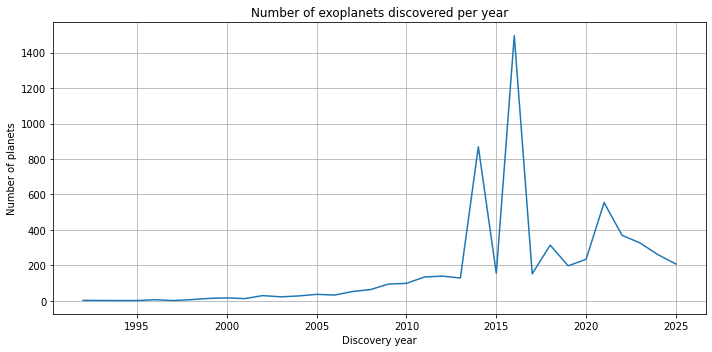

In [23]:
#Find how many exoplanets were found per year

planets_per_year = exo.groupby("disc_year")["pl_name"].nunique()

plt.figure(figsize=(10,5))
planets_per_year.plot(kind="line")
plt.title("Number of exoplanets discovered per year")
plt.xlabel("Discovery year")
plt.ylabel("Number of planets")
plt.grid(True)
plt.tight_layout()
plt.show()

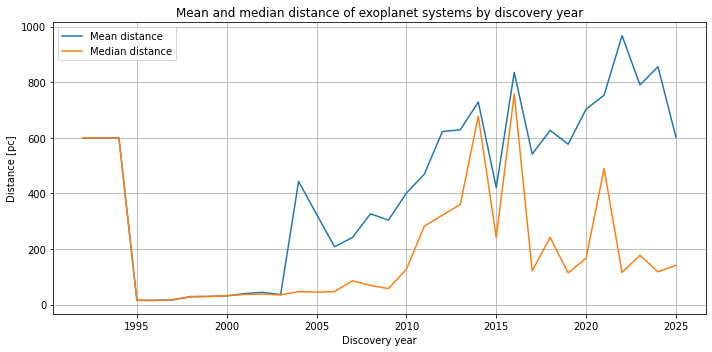

In [24]:
#Find correlation between year of discovery and distance of exoplanet

if "sy_dist" in exo.columns:
    dist_by_year = exo.dropna(subset=["sy_dist"]).groupby("disc_year")["sy_dist"].agg(["mean", "median"])

    plt.figure(figsize=(10,5))
    dist_by_year["mean"].plot(label="Mean distance")
    dist_by_year["median"].plot(label="Median distance")
    plt.title("Mean and median distance of exoplanet systems by discovery year")
    plt.xlabel("Discovery year")
    plt.ylabel("Distance [pc]")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    dist_by_year.tail()

In [25]:
#Methods of discovery

methods_counts = exo["discoverymethod"].value_counts().head(10)
methods_counts


Transit                          4464
Radial Velocity                  1157
Microlensing                      256
Imaging                            87
Transit Timing Variations          39
Eclipse Timing Variations          17
Orbital Brightness Modulation       9
Pulsar Timing                       8
Astrometry                          5
Pulsation Timing Variations         2
Name: discoverymethod, dtype: int64

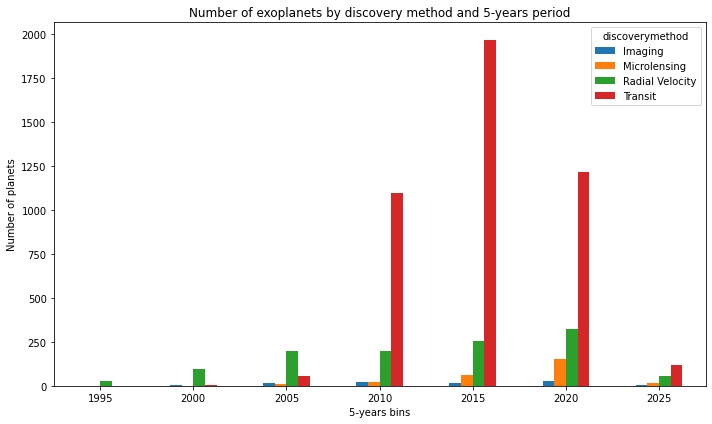

In [31]:
#See which method was used every 5 years

exo["5-years period"] = (exo["disc_year"] // 5) * 5

methods_by_period = (
    exo.groupby(["5-years period", "discoverymethod"])["pl_name"]
    .nunique()
    .reset_index()
)

top_methods = methods_counts.head(4).index
methods_by_period_top = methods_by_period[methods_by_period["discoverymethod"].isin(top_methods)]

pivot = methods_by_period_top.pivot(index="5-years period", columns="discoverymethod", values="pl_name")

pivot.plot(kind="bar", figsize=(10,6))
plt.title("Number of exoplanets by discovery method and 5-years period")
plt.xlabel("5-years bins")
plt.ylabel("Number of planets")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

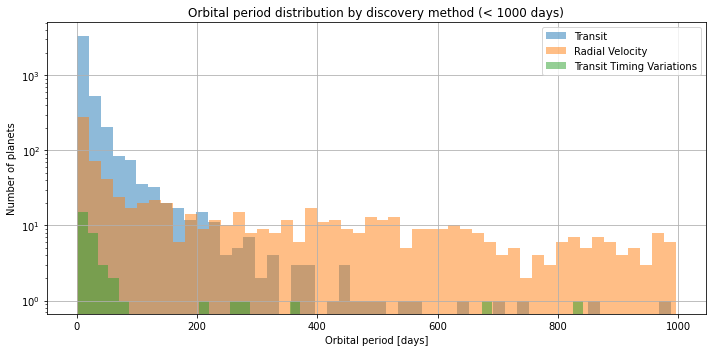

In [35]:
Method of discovery per orbital period

if "pl_orbper" in exo.columns:
    # Filtriamo periodi "ragionevoli" per evitare outlier assurdi
    mask = (exo["pl_orbper"] > 0) & (exo["pl_orbper"] < 1000)
    exo_period = exo[mask].dropna(subset=["discoverymethod"])

    # Guardiamo qualche metodo principale
    top_methods = exo_period["discoverymethod"].value_counts().head(3).index
    exo_period_top = exo_period[exo_period["discoverymethod"].isin(top_methods)]

    exo_period_top.groupby("discoverymethod")["pl_orbper"].describe()
    
plt.figure(figsize=(10,5))
for method in top_methods:
    exo_period_top[exo_period_top["discoverymethod"] == method]["pl_orbper"].hist(
        bins=50, alpha=0.5, label=method
    )

plt.title("Orbital period distribution by discovery method (< 1000 days)")
plt.xlabel("Orbital period [days]")
plt.ylabel("Number of planets")
plt.yscale('log')
plt.legend()
plt.tight_layout()
plt.show()

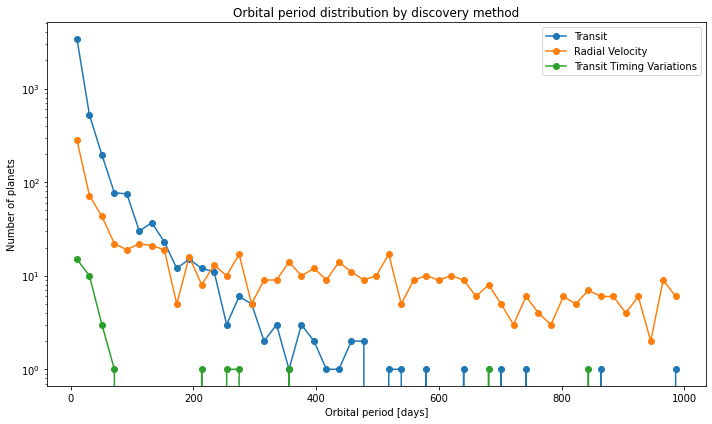

In [45]:
#Line-like visualisation

import numpy as np

plt.figure(figsize=(10,6))

# Definizione di bins lineari
bins = np.linspace(
    exo_period_top["pl_orbper"].min(),
    exo_period_top["pl_orbper"].max(),
    50
)

for method in top_methods:
    subset = exo_period_top[exo_period_top["discoverymethod"] == method]["pl_orbper"]

    counts, edges = np.histogram(subset, bins=bins, density=False)

    # Midpoints dei bins
    mids = (edges[:-1] + edges[1:]) / 2

    plt.plot(mids, counts, marker='o', linestyle='-', label=method)

plt.xlabel("Orbital period [days]")
plt.ylabel("Number of planets")
plt.yscale('log')
plt.title("Orbital period distribution by discovery method")
plt.legend()
plt.tight_layout()
plt.show()

In [46]:
#Save the clean dataset for future application

exo.to_csv("data/exoplanets_clean.csv", index=False)

<bound method DataFrame.info of        rowid     pl_name  hostname pl_letter    hd_name    hip_name  \
0          1    11 Com b    11 Com         b  HD 107383   HIP 60202   
4          5    11 UMi b    11 UMi         b  HD 136726   HIP 74793   
7          8    14 And b    14 And         b  HD 221345  HIP 116076   
9         10    14 Her b    14 Her         b  HD 145675   HIP 79248   
17        18  16 Cyg B b  16 Cyg B         b  HD 186427   HIP 96901   
...      ...         ...       ...       ...        ...         ...   
39064  39065   ups And b   ups And         b    HD 9826    HIP 7513   
39070  39071   ups And c   ups And         c    HD 9826    HIP 7513   
39076  39077   ups And d   ups And         d    HD 9826    HIP 7513   
39080  39081   ups Leo b   ups Leo         b        NaN         NaN   
39083  39084    xi Aql b    xi Aql         b  HD 188310   HIP 97938   

              tic_id                   gaia_dr2_id  \
0       TIC 72437047  Gaia DR2 3946945413106333696   
4      